# Music Genre Classification

## Recurrent Neural Network Implementation

Fabrizio Niro - Jacopo Signò

GTZAN Dataset - Music Genre Classification 

https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from torchinfo import summary
import pickle
import numpy as np
from d2l import torch as d2l
from torch.utils import data

In [2]:
with open('Processed_data/RNN/data_train', 'rb') as f:
    data_train = pickle.load(f)

with open('Processed_data/RNN/data_test', 'rb') as f:
    data_test = pickle.load(f)

In [3]:
data_train

[[array([[-5.57799244e+00, -4.90355587e+00, -4.50089407e+00, ...,
          -3.48708057e+00, -4.11902857e+00, -4.82451963e+00],
         [-5.16276598e+00, -5.35034990e+00, -5.30025959e+00, ...,
          -2.07022333e+00, -2.31246972e+00, -2.83185434e+00],
         [-3.44815779e+00, -3.95848775e+00, -3.60408807e+00, ...,
          -2.31950736e+00, -2.58197403e+00, -2.91278958e+00],
         ...,
         [ 3.56102712e-03,  8.24509189e-02,  2.62887806e-01, ...,
          -2.80997038e-01, -2.12304518e-01, -2.30965525e-01],
         [-2.39728004e-01, -1.76015601e-01, -1.64004654e-01, ...,
          -1.56947881e-01, -2.12853178e-01, -1.75195575e-01],
         [-1.27928108e-01, -6.50573671e-02,  1.08206615e-01, ...,
           2.55688671e-02,  1.64442807e-01,  1.77954733e-01]], dtype=float32),
  0],
 [array([[-3.77488589e+00, -3.42174506e+00, -3.73553705e+00, ...,
          -3.94631958e+00, -3.66769838e+00, -3.28381848e+00],
         [-2.91232491e+00, -3.15416217e+00, -3.68515515e+00, ...,
 

In [4]:
len(data_train[1][0])

129

In [5]:
print(len(data_train), len(data_train[0]))

8000 2


In [6]:
print(len(data_test), len(data_test[0]))

2000 2


In [7]:
batch_size = 64

train_iter = data.DataLoader(data_train, batch_size, shuffle=True,
                             num_workers = 2)

In [8]:
train_iter

In [9]:
next(iter(train_iter))

[tensor([[[-1.1925e+02, -1.6098e+02, -2.5956e+02,  ..., -2.3780e+02,
           -2.0561e+02, -1.9737e+02],
          [-2.2983e+02, -2.6903e+02, -2.2932e+02,  ..., -1.9101e+02,
           -1.7681e+02, -1.9110e+02],
          [-1.7986e+02, -1.7461e+02, -2.0758e+02,  ..., -2.8921e+02,
           -2.7150e+02, -2.2297e+02],
          ...,
          [ 5.0040e+00,  1.4122e-01, -5.3968e+00,  ...,  1.5542e+01,
            8.2216e+00,  7.0307e+00],
          [ 1.2028e+01,  1.0065e+01,  8.5003e+00,  ...,  3.7109e+00,
            4.1165e+00, -4.1835e+00],
          [-1.8071e+00,  7.4767e-01, -5.0919e+00,  ...,  1.5242e+01,
            1.5103e+01,  1.0788e+01]],
 
         [[-2.1786e+02, -1.9924e+02, -1.9960e+02,  ..., -1.8187e+02,
           -1.7793e+02, -1.7778e+02],
          [-1.7026e+02, -1.6876e+02, -1.7190e+02,  ..., -1.7704e+02,
           -1.7043e+02, -1.6526e+02],
          [-1.5043e+02, -1.5181e+02, -1.6116e+02,  ..., -1.7354e+02,
           -1.6324e+02, -1.6523e+02],
          ...,
    

In [10]:
test_iter = data.DataLoader(data_test, batch_size, shuffle=True,
                             num_workers = 2)

In [11]:
test_iter

In [12]:
next(iter(test_iter))

[tensor([[[-2.8806e+02, -1.6978e+02, -1.2403e+02,  ..., -1.3791e+02,
           -7.8716e+01, -6.7799e+01],
          [-9.4858e+01, -1.3730e+02, -1.7652e+02,  ..., -2.4163e+02,
           -2.3270e+02, -1.7678e+02],
          [-1.3942e+02, -1.2726e+02, -1.3188e+02,  ..., -9.6117e+01,
           -1.2614e+02, -1.2915e+02],
          ...,
          [-4.2896e+00, -4.2030e+00, -1.5783e+00,  ...,  6.5169e+00,
           -4.1320e+00, -6.3511e+00],
          [-7.2685e+00, -9.0135e+00, -3.1629e+00,  ...,  1.2222e-01,
            2.3678e+00,  2.4720e+00],
          [ 1.5131e+00,  2.8670e-01,  1.6197e+00,  ...,  1.5880e+01,
            1.5298e+01,  1.4517e+01]],
 
         [[-1.5895e+02, -1.4167e+02, -1.5384e+02,  ..., -1.5105e+02,
           -1.5870e+02, -1.6855e+02],
          [-1.7321e+02, -1.4180e+02, -1.0981e+02,  ..., -1.1805e+02,
           -6.2017e+01, -3.8941e+01],
          [-3.9458e+01, -5.4366e+01, -6.9017e+01,  ..., -4.9118e+01,
           -6.5031e+01, -7.7716e+01],
          ...,
    

In [13]:
next(iter(test_iter))[0].shape

torch.Size([64, 129, 20])

In [14]:
next(iter(test_iter))[0][0].shape

torch.Size([129, 20])

In [15]:
device = d2l.try_gpu()

In [16]:
torch.cuda.is_available()

True

In [17]:
input_size = data_train[0][0].shape[1] # 20

hidden_size = 500 # 20

num_layers = 6

dropout = 0

classes_num = 10

In [18]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.gru = nn.GRU(
            input_size=input_size, hidden_size=hidden_size,
             num_layers=num_layers, bias=False, batch_first=True, dropout=dropout, bidirectional=False)
        
        self.relu = nn.ReLU()
        
        self.lin1 = nn.Linear(hidden_size, hidden_size)

        self.lin2 = nn.Linear(hidden_size, classes_num)

        self.sm = nn.Softmax()


    def forward(self, x, h):

        out, h = self.gru(x, h)

        out = self.lin1(self.relu(out[:,-1]))

        out = self.lin2(self.relu(out))

        out = self.sm(out)

        return out, h


    def init_hidden(self, batch_size):

        weight = next(self.parameters()).data

        hidden = weight.new(self.num_layers, batch_size, self.hidden_size).zero_().to(device)

        return hidden

In [19]:
 net = Model()

In [43]:
for X, y in train_iter:
  
  h = net.init_hidden(len(X))
  out, h = net(X.to(device), h.to(device))
  print(out.shape,"\n")
  print(torch.round(out, decimals=3),"\n", out.dtype)
  print(y, len(y))
  break

torch.Size([64, 10]) 

tensor([[0.0000, 0.0000, 0.9980, 0.0010, 0.0000, 0.0000, 0.0010, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0010, 0.0000, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.9980, 0.0010, 0.0000, 0.0010, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0010, 0.0000, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
     

/tmp/ipykernel_94933/147558428.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.sm(out)


In [45]:
for X, y in test_iter:
  
  h = net.init_hidden(len(X))
  
  out, h = net(X.to(device), h.to(device))
  print(out.shape,"\n")
  print(torch.round(out, decimals=3),"\n", out.dtype)

  print(y, len(y))
  break

torch.Size([64, 10]) 

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0020, 0.0000, 0.0000, 0.0000, 0.9980, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0430, 0.0000, 0.0000, 0.9570, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0840, 0.9160, 0.0000, 0.0000, 0.0000, 0.0000,
     

/tmp/ipykernel_94933/147558428.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.sm(out)


In [ ]:
for X, y in train_iter:
    print(y.type(torch.long))
    break

tensor([4, 7, 7, 4, 7, 3, 3, 4, 4, 7, 4, 3, 2, 1, 3, 4, 4, 5, 7, 6, 3, 4, 7, 5,
        5, 0, 2, 2, 7, 6, 2, 7, 4, 5, 0, 6, 0, 6, 7, 2, 2, 6, 0, 6, 4, 2, 1, 2,
        7, 2, 2, 6, 2, 3, 4, 3, 3, 4, 2, 4, 2, 7, 1, 7])


In [22]:
def train(train_loader, learn_rate, EPOCHS=5):
 
   
    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learn_rate)
    
    net.train()
    print("Starting Training of GRU model")

    epoch_times = []
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        
        #start_time = d2l.Timer().start()
        
        h = net.init_hidden(batch_size)
        avg_loss = 0.
        counter = 0
        
        for x, label in train_loader:
            counter += 1
            h = h.data
            net.zero_grad()
            out, h = net(x.to(device), h)
            label = label.type(torch.long)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            
    
            
            avg_loss += loss.item()
            if counter%200 == 0:
                print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(
                    epoch, counter, len(train_loader), avg_loss/counter))
                
        
        
        
        #current_time = d2l.Timer().stop()

        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss/len(train_loader)))
        #print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        #epoch_times.append(current_time-start_time)
    #print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
    return net

In [23]:
learn_rate = 0.0001

#train(net, train_iter, test_iter, num_epochs, lr)
train(train_iter, learn_rate, EPOCHS=20)

Starting Training of GRU model


RuntimeError: Input and parameter tensors are not at the same device, found input tensor at cuda:0 and parameter tensor at cpu

In [22]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    # No. of correct predictions, no. of predictions
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            # Required if doing the fine-tuning of BERT (recurrent network)
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        h = net.init_hidden(len(X))
        metric.add(d2l.accuracy(net(X, h), y), y.numel())
    return metric[0] / metric[1]

In [23]:
def train(net, train_iter, test_iter, num_epochs, lr,
              device=d2l.try_gpu()):
    """Train a model with a GPU"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) # Xavier parameter initialization: a particular method (see textbook section)
    net.apply(init_weights)
    print('training on', device)

    net.to(device) # MOVE the net to the GPU (if available)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)

    h = net.init_hidden(batch_size)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train() # Set the network to training mode (not evaluation mode)

        for i, (X, y) in enumerate(train_iter):
            timer.start()
            h = h.data
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device) #MOVE each minibatch of data to the GPU (if available)
            y_hat, h = net(X, h)
            l = loss(y_hat, y.type(torch.long))
            l.backward()
            optimizer.step()
            
            with torch.no_grad(): # detach gradient calculation for avoiding effect on backpropagation calculation
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        #test_acc = evaluate_accuracy_gpu(net, test_iter)
        #animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f},') #f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

In [21]:
def train(net, train_iter, test_iter, num_epochs, lr,
              device=d2l.try_gpu()):
    """Train a model with a GPU"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) # Xavier parameter initialization: a particular method (see textbook section)
    net.apply(init_weights)
    print('training on', device)

    net.to(device) # MOVE the net to the GPU (if available)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)

    h = net.init_hidden(batch_size)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train() # Set the network to training mode (not evaluation mode)

        for i, (X, y) in enumerate(train_iter):
            timer.start()
            h = h.data
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device) #MOVE each minibatch of data to the GPU (if available)
            y_hat, h = net(X, h)
            l = loss(y_hat, y.type(torch.long))
            l.backward()
            optimizer.step()
            
            with torch.no_grad(): # detach gradient calculation for avoiding effect on backpropagation calculation
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

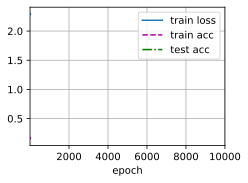

In [24]:
lr, num_epochs = 0.01, 10000
train(net, train_iter, test_iter, num_epochs, lr)